## Homework 6
### Meghan Edgerton
### Math 472

## Question 1:

Use the EM algorithm to fit a $(1-\pi)$ : $\pi$ mixture of two Poission distributions, Poisson$(\lambda_{1})$ and Poisson$(\lambda_{2})$, to the following data.

### 1(a):
Derive the EM algorithm for the maximum likelihood estimates of $\pi, \lambda_{1}, \lambda_{2}$. Present your derivation in a Markdown cell in the Jupyter Notebook.

For the algorithm, we will let $X =$ observed data, $Z =$ missing data, and $Y =$ complete data.

Our PDF of the mixture of Poisson distribution is then:

$f(x;\pi,\lambda_{1},\lambda_{2}) = (1 - \pi)Poi(x;\lambda_{1}) + \pi Poi(x;\lambda_{2})$

where $Poi(\lambda) = \frac{\lambda^{x}}{x!}e^{-\lambda}$

The missing data is $Z = (z_{1},...,z_{n})^{T}$, in which $z_{j}$ represents which element of the jth data is the first $(z=0)$ or the second $(z=1)$.

Our parameters are $\theta = (\pi, \lambda_{1},\lambda_{2})$.

The log-likelihood function will be:

$l(\theta;y) = log L(\theta;y) = \sum_{i=1}^{n} [(1-z_{i})(Poi(\lambda_{1}) + z_{i}Poi(\lambda_{2})] + \sum_{i=1}^{n} [z_{i} log(1-\pi) + (z_{i})*log(1-z_{i})]$

For the E-step, we define $Q(\theta | \theta^{(t)})$:

$Q(\theta | \theta^{(t)}) = \sum_{i=1}^{n} [(1-z_{i}^{(t)})Poi(\lambda_{1}) + z_{i}^{(t)}Poi(\lambda_{2})] + \sum_{i=1}^{n} [z_{i}^{(t)} log(\pi) + (1-z_{i}^{(t)})*log(1-\pi)]$,

where $z_{i}^{(t)} = E(z_{i} | \theta) \frac{\pi^{(t)} Poi(\lambda_{2})}{f(x;\theta)}$.

Then, the MLEs of $\pi, \lambda_{1},$ and $\lambda_{2}$ are found in the M-step by taking the partial derivaties of $Q(\theta | \theta^{(t)})$ which respect to each parameter (maximizing $Q(\theta | \theta^{(t)})$:

$\hat{\pi} = \frac{dQ}{d\pi} = 0 \implies \sum_{i=1}^{n} \frac{z_{i}^{(t)}}{\pi} + \frac{1-z_{i}^{(t)}}{1-\pi}$

$\hat{\pi} = \sum_{i=1}^{n} \frac{z_{i}^{(t)}}{n}$

$-------------------------------------$

$\hat{\lambda_{1}} = \frac{dQ}{d\lambda_{1}} = \sum_{i=1}^{n} (1-z_{i}^{(t)})(\frac{x_{i}}{\lambda_{1}} - 1) = 0$

$\implies \frac{\sum_{i=1}^{n} (x_{i} - x_{i}z_{i})}{\lambda_{1}} - \sum_{i=1}^{n}(1-z_{i}^{(t)}) = 0$

$\hat{\lambda_{1}} = \frac{\sum_{i=1}^{n} (x_{i} - x_{i}z_{i}^{(t)})}{\sum_{i=1}^{n} (1-z_{i}^{(t)})}$

$-------------------------------------$

$\hat{\lambda_{2}} = \frac{dQ}{d\lambda_{2}} = \sum_{i=1}^{n} z_{i}^{(t)} (\frac{x_{i}}{\lambda_{2}} -1) = 0$

$\implies \frac{\sum_{i=1}^{n} x_{i}z_{i}^{(t)}}{\lambda_{2}} = \sum_{i=1}^{n} z_{i}^{(t)}$

$\hat{\lambda_{2}} = \frac{\sum_{i=1}^{n} x_{i}z_{i}^{(t)}}{\sum_{i=1}^{n}z_{i}^{(t)}}$


### 1(b):
Implement the EM algorithm for this data set. Present the output of your code in the format similar to Table 4.1 on page 102 of the book Computational Statistics.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import poisson, relfreq, multivariate_normal
from scipy.linalg import norm
from mpl_toolkits.mplot3d import Axes3D

# Instantiating the data from the first question

val0 = np.zeros((162,1))
val1 = np.ones((267,1))
val2 = 2*np.ones((271,1))
val3 = 3*np.ones((185,1))
val4 = 4*np.ones((111,1))
val5 = 5*np.ones((61,1))
val6 = 6*np.ones((27,1))
val7 = 7*np.ones((8,1))
val8 = 8*np.ones((3,1))
val9 = 9*np.ones((1,1))

x = np.vstack((val0,val1,val2,val3,val4,val5,val6,val7,val8,val9))

# Defining all of the derived MLEs of pi, lambda1, and lambda2

def mlepi(z):
    n = z.size
    return np.sum(z/n)

def mlelambda1(x,z):
    return (np.sum(x-z*x))/(np.sum(1-z))

def mlelambda2(x,z):
    return (np.sum(x*z))/(np.sum(z))

# Defining the pdf of the mixture of poisson distributions

def f(x,pi,lambda1,lambda2):
    return (1-pi)*poisson.pmf(x,lambda1) + pi*poisson.pmf(x,lambda2)

def expected(x,pi,lambda1,lambda2):
    num = pi*poisson.pmf(x,lambda2)
    denom = (1-pi)*poisson.pmf(x,lambda1)+pi*poisson.pmf(x,lambda2)
    E = num/denom
    return E

# Choose starting values and max iterations for loop

pi = 0.365
lambda1 = 2.4
lambda2 = 1.3
max_iters = 1000

pi_vals = [pi]
lambda1_vals = [lambda1]
lambda2_vals = [lambda2]
res = []
theta_vals = []

# Running the data through the expected value function and the MLE functions
# and then printing them in a table similar to that of table 4.1

for i in range(max_iters):
    z = expected(x,pi,lambda1,lambda2)
    lambda1 = mlelambda1(x,z)
    lambda2 = mlelambda2(x,z)
    pi = mlepi(z)
    lambda1_vals.append(lambda1)
    lambda2_vals.append(lambda2)
    pi_vals.append(pi)
    theta_vals.append([pi,lambda1,lambda2])
    res.append([i,pi,lambda1,lambda2])
    
for i in range(999):
    res[i].append(norm(np.array(theta_vals[i+1])-np.array(theta_vals[i]))/norm(np.array(theta_vals[i])))
    res[i].append(np.round((pi_vals[i+1] - pi_vals[-1])/(pi_vals[i]-pi_vals[-1]),3))
    res[i].append(np.round((lambda1_vals[i+1] - lambda1_vals[-1])/(lambda1_vals[i] - lambda1_vals[-1]),3))
    res[i].append(np.round((lambda2_vals[i+1] - lambda2_vals[-1])/(lambda2_vals[i] - lambda2_vals[-1]),3))
    
# Creating the data frame similar to table 4.1

df = pd.DataFrame(res[970:980], columns = ['i','pi','lambda1','lambda2','R','D pi','D Lambda1','D Lambda2'])
df = df.style.hide_index()
df = df.set_table_styles([dict(selector = 'th', props = [('text-align','center')])])
df

i,pi,lambda1,lambda2,R,D pi,D Lambda1,D Lambda2
970,0.359826,2.66333,1.25599,2.0461e-07,0.965,0.965,0.965
971,0.359826,2.66333,1.25599,2.03723e-07,0.963,0.963,0.963
972,0.359826,2.66333,1.25599,2.0284e-07,0.962,0.962,0.962
973,0.359827,2.66333,1.25599,2.0196e-07,0.961,0.961,0.961
974,0.359827,2.66333,1.25599,2.01085e-07,0.959,0.959,0.959
975,0.359827,2.66333,1.25599,2.00213e-07,0.958,0.958,0.958
976,0.359827,2.66333,1.25599,1.99345e-07,0.956,0.956,0.956
977,0.359828,2.66333,1.25599,1.98481e-07,0.954,0.954,0.954
978,0.359828,2.66333,1.25599,1.97621e-07,0.952,0.952,0.952
979,0.359828,2.66333,1.256,1.96764e-07,0.95,0.95,0.95


### 1(c):
In a single plot, show the relative frequency and fitted probability for the observed data, respectively, with appropriate legend.

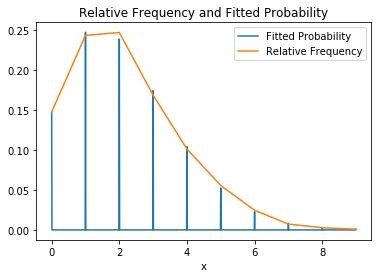

In [2]:
# Making the plot to show the relative frequency along with the fitted
# probability for the observed data

xs = np.linspace(0,9,1000)
plt.plot(xs,f(xs,pi,lambda1,lambda2))
xs = np.arange(10)
rel = relfreq(x, numbins = 10)
plt.plot(xs,rel[0])
plt.title('Relative Frequency and Fitted Probability')
plt.xlabel('x')
plt.legend(('Fitted Probability','Relative Frequency'))

### 1(d):
What is the probability that the value 10 will be observed?

In [3]:
# Evalute the pdf of poisson mixture at x=10

prob = f(10,pi,lambda1,lambda2)

print('The probability of the value 10 being observed is:', prob)

The probability of the value 10 being observed is: 0.0002211388272112704


## Question 2:
Suppose that the probability density function (PDF) of a bivariate random vector $X = (X_{1},X_{2})^{T}$ is a mixture of bivariate normal

$f(x;\theta) = (1-\pi)\phi(x;\mu_{1},\Sigma_{1})+\pi\phi(x;\mu_{2},\Sigma_{2}),$

where $\phi(x;\mu,\Sigma)$ is the bivariate normal PDF with mean $\mu$ and covariance matrix $\Sigma$, and $\theta = [\pi,\mu_{1},\mu_{2},\Sigma_{1},\Sigma_{2}].$

The data set data_mvnorm2mix.csv is a random sample from these two normal mixtures, implement the EM algorithm to find the maximum likelihood estimate (MLE) of the parameter $\theta$. Present your result as following:


### 2(a):
Print the MLE of the parameter $\theta$.

In [4]:
data = pd.read_csv('data_mvnorm2mix.csv', sep=',', header = None).to_numpy()

def fnorm(x,pi,mu1,mu2,sigma1,sigma2):
    return (1-pi)*multivariate_normal.pdf(x,mean = mu1.reshape(2,),cov = sigma1) + pi*multivariate_normal.pdf(x,mean = mu2.reshape(-1,),cov=sigma2)

def mlepi(z):
    return (np.sum(z))/(z.size)

def mlemu1(z,x):
    n = z.size
    a = []
    for i in range(n):
        a.append(((1-z[i])*x[i].T))
    top = np.sum(a,axis=0).reshape(2,1)
    bottom = (n-np.sum(z))
    return top/bottom

def mlemu2(z,x):
    a = []
    for i in range(z.size):
        a.append((z[i]*x[i].T))
    top = (np.sum(a,axis=0).reshape(2,1))
    bottom = np.sum(z)
    return top/bottom

def mlesigma1(z,x,mu1):
    a = []
    for i in range(z.size):
        a.append(((1-z[i])*(x[i].reshape(2,1)-mu1.reshape(2,1))@(x[i].reshape(2,1)-mu1).T))
    top = np.sum(a,axis=0)
    bottom = (z.size-np.sum(z))
    return top/bottom

def mlesigma2(z,x,mu2):
    a = []
    for i in range(z.size):
        a.append((z[i]*(x[i].reshape(2,1)-mu1.reshape(2,1))@(x[i].reshape(2,1)-mu1).T))
    top = np.sum(a,axis=0)
    bottom = (z.size-np.sum(z))
    return top/bottom

def L(data,pi,mu1,mu2,sigma1,sigma2):
    a = []
    for i in range(z.size):
        p1 = (1-z[i])*np.log(multivariate_normal.pdf(data[i],mean = mu1.reshape(-1,),cov=sigma1))
        p2 = z[i]*np.log(multivariate_normal.pdf(data[i],mean = mu2.reshape(-1,),cov=sigma2))
        p3 = (1-z[i])*np.log(1-pi)+z[i]*np.log(pi)
        a.append(p1 + p2 + p3)
    return np.sum(a)

def E(x,pi,mu1,mu2,sigma1,sigma2):
    return pi*multivariate_normal.pdf(x,mean = mu2.reshape(-1,),cov=sigma2)/fnorm(x,pi,mu1,mu2,sigma1,sigma2)

max_iters = 20
pi = 0.6
mu1 = np.array([[1],[2]])
mu2 = np.array([[2],[4]])
sigma1 = np.array([[2,1],[3,8]])
sigma2 = np.array([[1,-1],[-1,6]])
llist = []

for i in range(max_iters):
    z = E(data,pi,mu1,mu2,sigma1,sigma2)
    z = z.reshape(800,1)
    mu1 = mlemu1(z,data)
    mu2 = mlemu2(z,data)
    pi = mlepi(z)
    sigma1 = mlesigma1(z,data,mu1)
    sigma2 = mlesigma2(z,data,mu2)
    llist.append(L(data,pi,mu1,mu2,sigma1,sigma2))

print('The MLEs for the parameter theta are as follows:')
print('------------------------------------------------')
print('MLE for pi:', pi)
print('MLE for mu 1:', mu1)
print('MLE for mu 2:', mu2)
print('MLE for sigma 1:', sigma1)
print('MLE for sigma 2:', sigma2)


The MLEs for the parameter theta are as follows:
------------------------------------------------
MLE for pi: 0.12400892104491099
MLE for mu 1: [[0.50274984]
 [0.92177081]]
MLE for mu 2: [[ 2.51018789]
 [-0.01733736]]
MLE for sigma 1: [[4.63299072 0.97375163]
 [0.97375163 1.55160382]]
MLE for sigma 2: [[ 0.66419184 -0.31037503]
 [-0.31037503  0.15093603]]


C:\Users\megha\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log


### 2(b):
Plot the value of the log-likelihood function vs. iteration number. Comment on the pattern of the plot.

Text(0, 0.5, 'Log-Likelhood Function')

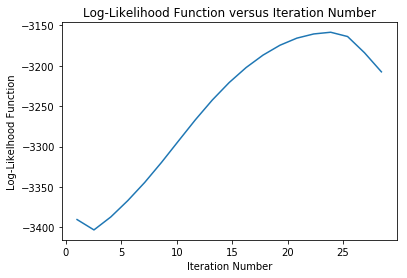

In [5]:
# Make the plot
xs = np.linspace(1,30,20)
plt.figure()
plt.plot(xs,llist)
plt.title('Log-Likelihood Function versus Iteration Number')
plt.xlabel('Iteration Number')
plt.ylabel('Log-Likelhood Function')

### 2(c):
Classify each observation into one of the two classes. Display the classification results in a scatter plot with two different colors.

Text(0.5, 1.0, 'Classification Scatterplot')

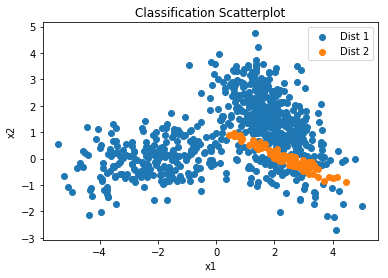

In [6]:
def display1(x,mu1,sigma1):
    return multivariate_normal.pdf(x,mean = mu1.reshape(2,),cov=sigma1)

def display2(x,mu2,sigma2):
    return multivariate_normal.pdf(x,mean = mu2.reshape(-1,),cov=sigma2)

d1x1 = []
d2x1 = []
d1x2 = []
d2x2 = []

for i in range(800):
    if display1(data[i],mu1,sigma1) > display2(data[i],mu2,sigma2):
        d1x1.append(data[i,0])
        d1x2.append(data[i,1])
    else:
        d2x1.append(data[i,0])
        d2x2.append(data[i,1])
plt.figure()
plt.scatter(d1x1,d1x2)
plt.scatter(d2x1,d2x2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(("Dist 1","Dist 2"))
plt.title("Classification Scatterplot")

### 2(d):
Plot a surface plot of the fitted PDF $f(x;\hat{\theta})$.

Text(0.5, 0.92, 'Surface Plot of the Fitted PDF')

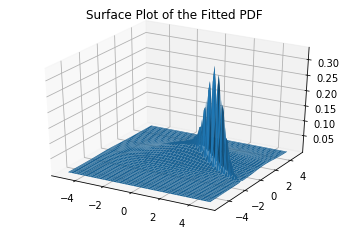

In [7]:
# Generate the surface plot

xc = np.linspace(-5,5,100)
yc = np.linspace(-5,5,100)
zs = np.zeros((100,100))

n = 100

for i in range(n):
    for j in range(n):
        x1, x2 = np.meshgrid(xc,yc)
        xy = np.column_stack([x1.flat,x2.flat])
        zs = fnorm(xy,pi,mu1,mu2,sigma1,sigma2)
        zs = zs.reshape(x1.shape)
        
figure = plt.figure()
ax= figure.gca(projection = '3d')
ax.plot_surface(x1,x2,zs)
plt.title('Surface Plot of the Fitted PDF')

## Question 3 (Non-coding):

Let $\{a_{1},...,a_{n}\}$ be a set of positive real numbers. Its arithmetic mean (AM), geometric mean (GM), harmonic mean (HM) are defined as:

$AM = \frac{1}{n} \sum_{i=1}^{n} a_{i}$

$GM = (\prod_{i=1}^{n} a_{i})^{1/n}$

$HM = \frac{1}{\frac{1}{n} \sum_{i=1}^{n} \frac{1}{a_{i}}}$

Prove:

$HM \leq GM \leq AM.$

First, mathematical induction and Jensen's inequality is used to prove that $AM \geq GM$.

Taking the log of both the $GM$ and $AM$ and simplifying them gives:

$log(GM) = log(\prod_{i=1}^{n} a_{i})^{1/n} = \frac{1}{n} log(\prod_{i=1}^{n} a_{i}) = \frac{1}{n}(log a_{1}+...+log a_{n})$

$log(AM) = log(\frac{1}{n} \sum_{i=1}^{n} a_{i}) = log(\frac{a_{1}+...+a_{n}}{n})$

Goal: Prove that $\frac{1}{n}(log a_{1}+...+log a_{n}) \leq log(\frac{a_{1}+...+a_{n}}{n})$.

(Proof by Induction):

Base Step($n=2$): $\frac{1}{2}(log a_{1} + log a_{2}) \leq log(\frac{a_{1}+a_{2}}{2})$

Suppose $a_{1} = 2$ and $a_{2} = 3$:

$\frac{1}{2}(log(2) +log(3)) \leq log(\frac{2+3}{2}) \approx 0.38908.. \leq 0.39794..$

Even though this is a single case, it will still hold for all $a_{n}$ because logarithmic functions are monotonically increasing.

Seeing as the graph for $\frac{\log a_{1}+...+log a_{n}}{n}$ is convex, Jensen's inequality allows us to proceed with the process of saying that $\frac{1}{n}(log a_{1}+...+log a_{n}) \leq log(\frac{a_{1}+...+a_{n}}{n})$.

Induction Step($n=k-1$): Assume that for some k, 

$\frac{1}{k-1}(log a_{1}+...+a_{k-1}) \leq log(\frac{a_{1}+...+a_{k-1}}{k-1})$.

$(n=k): \frac{1}{k}(log a_{1}+...+log a_{k-1}+log a_{k}) \leq log(\frac{a_{1}+...+a_{k-1}+a_{k}}{k})$

$\leq \frac{(k-1)*log(\frac{a_{1}+...+a_{k-1}}{k-1}) + log a_{k}}{k} \leq \frac{k-1}{k} log(\frac{a_{1}+...+a_{k-1}}{k-1}) + \frac{log a_{k}}{k}$

$\leq log[(\frac{k-1}{k})*(\frac{a_{1}+...+a_{k-1}}{(k-1)}) + \frac{a_{k}}{k}] \implies log[\frac{a_{1}+...+a_{k-1}+a_{k}}{k}]$.

So, by mathematical induction, it can be concluded that:

$\frac{log a_{1}+...+log a_{n}}{n} \leq log(\frac{a_{1}+...+a_{n}}{n})$. In other words, $GM \leq AM$.

For the harmonic mean (HM), the goal is to prove $HM \leq GM$.

Suppose $\{y_{1},...,y_{n}\} = \{\frac{1}{a_{1}},...,\frac{1}{a_{n}}\}$. Then, $HM = \frac{1}{n}(y_{1}*...*y_{n})^{-1}$.

The $GM$ of $y_{n}$ would then be $GM = (y_{1}*...*y_{n})^{1/n}$.

It is clear that $(y_{1}*...*y_{n})^{1/n} \leq \frac{y_{1}+...+y{n}}{n}$.

$\implies (\frac{1}{a_{1}*...*a_{n}})^{1/n} \leq \frac{1}{n} \sum_{i=1}^{n} \frac{1}{a_{i}}$

$\implies HM = \frac{n}{\sum_{i=1}^{n} \frac{1}{a_{i}}} \leq (a_{1}*...*a_{n})^{1/n}$

$\implies n(\sum_{i=1}^{n} \frac{1}{a_{i}})^{-1} \leq (a_{1}*...*a_{n})^{1/n}$. 

So, this shows that $HM \leq GM$.

Since $HM \leq GM$ and $GM \leq AM$, it has been proven that 

$HM \leq GM \leq AM$. 